## Gradient Descent (GD):
It’s an optimization algorithm used to minimize a loss function by iteratively updating parameters in the opposite direction of the gradient. Core idea: move step-by-step towards the global or local minimum.

In [240]:
import pandas as pd 

import numpy as np 
from sklearn.datasets import make_regression

In [241]:
X,y = make_regression(n_samples=4,n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)

In [242]:
import matplotlib.pyplot as plt 

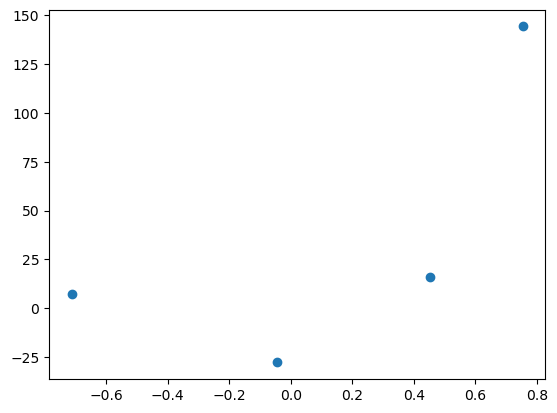

In [243]:
plt.scatter(X,y)

# First Lets apply OLS

In [244]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [245]:
reg.fit(X,y)

LinearRegression()

In [246]:
reg.coef_

array([78.35063668])

In [247]:
reg.intercept_

np.float64(26.15963284313262)

# Now with Gradient Descent

In [210]:
pred_y = ((78.35*X) + 0).reshape(4) 
# m = 78.34 and b= 0 for starting 
# .reshape makes (4,1) to (4,) 
# most loss functions (like MSE) expect (n,)
# because of array shape mismatch

In [211]:
pred_y.shape

(4,)

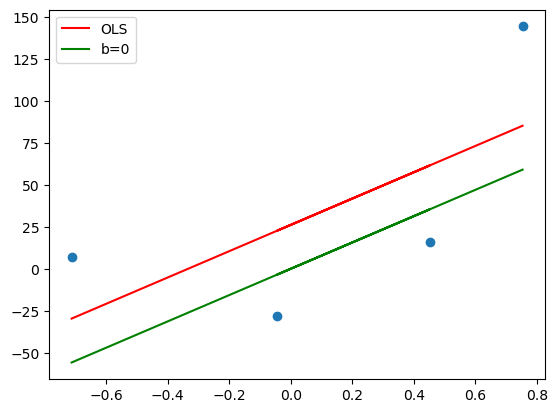

In [212]:
plt.scatter(X,y)
plt.plot(X, reg.predict(X),color= 'red',label ='OLS')
plt.plot(X,pred_y, color = 'green', label = 'b=0')
plt.legend()
plt.show()

In [213]:
b

np.float64(25.95042662617943)

# First iteration

In [214]:
m = 78.35
lr = 0.1
b = 0
loss_slope =-2*np.sum(y -m*X.ravel() - b)
loss_slope

np.float64(-209.27763408209216)

In [215]:
step_size = loss_slope * lr

In [216]:
step_size

np.float64(-20.927763408209216)

In [217]:
b = b - step_size
b1 = b
b

np.float64(20.927763408209216)

In [218]:
y_pred1= ((78.35*X) +b).reshape(4)

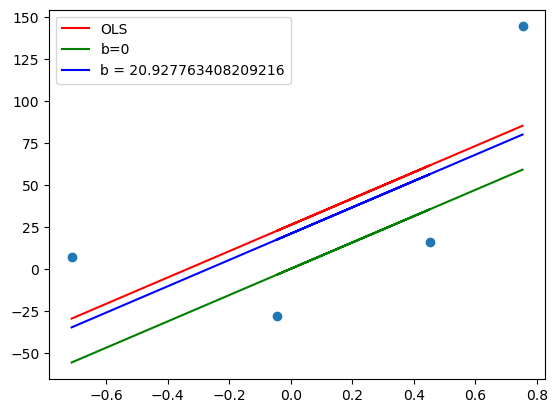

In [219]:
plt.scatter(X,y)
plt.plot(X, reg.predict(X),color= 'red',label ='OLS')
plt.plot(X,pred_y, color = 'green', label = 'b=0')
plt.plot(X,y_pred1,color = 'blue', label = 'b = {}'.format(b))
plt.legend()
plt.show()

# Iteration 2nd

In [220]:
loss_slope =-2*np.sum(y -m*X.ravel() - b)
step_size = loss_slope * lr
b = b - step_size
y_pred2= ((78.35*X) +b).reshape(4)
b2= b
b

np.float64(25.11331608985106)

# iteration 3rd

In [221]:
loss_slope =-2*np.sum(y -m*X.ravel() - b)
step_size = loss_slope * lr
b = b - step_size
y_pred3= ((78.35*X) +b).reshape(4)
b3 = b
b

np.float64(25.95042662617943)

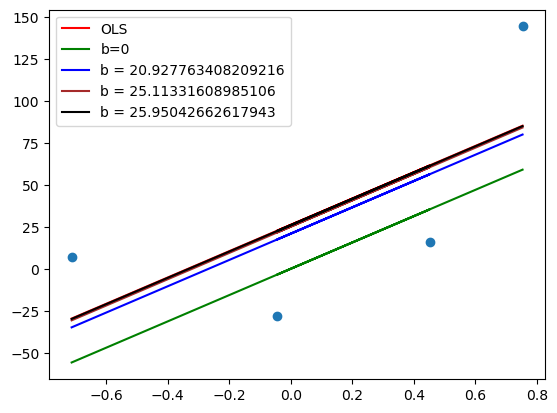

In [222]:
plt.scatter(X,y)

plt.plot(X, reg.predict(X),color= 'red',label ='OLS')
plt.plot(X,pred_y, color = 'green', label = 'b=0')
plt.plot(X,y_pred1,color = 'blue', label = f"b = {b1}")
plt.plot(X,y_pred2,color = 'brown',label = f"b = {b2}")
plt.plot(X,y_pred3,color = 'black', label = f"b = {b3}")
plt.legend()
plt.show()

In [345]:
class MySGD:
    def __init__(self,m = 78.35,b= 0 ):
        self.m = 78.35
        self.b = 0
        self.epochs = None
        self.lr = None

    def fit(self,X,y,epochs = 10, lr =0.1):
        self.epochs = epochs
        self.lr =lr
        b_arr = []
        y_pred_arr = []
                
        for i in range(epochs):
            loss_slope =-2*np.sum(y -self.m*X.ravel() - self.b)
            step_size = loss_slope * lr
            self.b = self.b - step_size
            
            b_arr.append(self.b) 
            y_pred = ((self.m*X) +self.b).ravel()
            y_pred_arr.append(y_pred)
        print("Final SGD b:", self.b)
        print("Final SGD m:", self.m)
        # return b_arr, y_pred_arr
 

In [321]:
gd = MySGD()

gd.fit(X,y, epochs=10, lr=0.1)

Final b: -55067160707.140144
Final m: 78.35


# When m and b are variable 

In [346]:
class MyGD:
    def __init__(self,m = 1,b= 0 ):
        self.m = 1
        self.b = 0
        self.epochs = None
        self.lr = None

    def fit(self,X,y,epochs = 10, lr =0.1):
        self.epochs = epochs
        self.lr =lr
        b_arr = []
        m_arr = []
                
        for i in range(epochs):
            loss_slope =-2*np.sum(y -self.m*X.ravel() - self.b)
            step_size = loss_slope * lr
            self.b = self.b - step_size
            b_arr.append(self.b)

            loss_slope_m =-2*np.sum((y -self.m*X.ravel() - self.b)*X)
            step_size_m = loss_slope_m * lr
            self.m = self.m - step_size_m
            m_arr.append(self.m)
            
        print("Final VGD b:", self.b)
        print("Final VGD m:", self.m)
        return b_arr,m_arr


In [323]:
gd2 = MyGD()
gd2.fit(X,y,epochs = 15 , lr = 0.12)

Final b: -2.8506012122755594e+36
Final m: -3.535049032128117e+38


In [324]:
X

array([[-0.29169375],
       [-1.91328024],
       [ 0.31424733],
       [ 0.54256004],
       [ 1.57921282],
       [ 0.24196227],
       [ 0.76743473],
       [-1.47852199],
       [ 0.19686124],
       [-0.56228753],
       [ 1.05712223],
       [-1.15099358],
       [-0.46947439],
       [-0.60170661],
       [-0.2257763 ],
       [ 0.82254491],
       [-1.4123037 ],
       [-0.60063869],
       [-0.23415337],
       [-0.54438272],
       [-1.95967012],
       [-0.46341769],
       [ 1.52302986],
       [-1.05771093],
       [-0.23413696],
       [ 0.11092259],
       [-0.11564828],
       [ 1.46564877],
       [-1.22084365],
       [-0.90802408],
       [-0.01349722],
       [ 0.49671415],
       [-0.71984421],
       [ 0.0675282 ],
       [ 0.37569802],
       [ 0.17136828],
       [-1.76304016],
       [-1.01283112],
       [ 0.2088636 ],
       [ 0.64768854],
       [-0.1382643 ],
       [-1.32818605],
       [-0.46572975],
       [ 0.73846658],
       [ 0.34361829],
       [-0

# Better Version for all dataset

In [347]:
class MyBetterGD:
    def __init__(self,m = 1,b= 0 ):
        self.m = 1
        self.b = 0

    def fit(self,X,y,epochs = 10, lr =0.1):
        self.epochs = epochs
        self.lr =lr
        X =  X.ravel()
        y = y.ravel()
        n = len(y)
        
        b_arr = []
        m_arr = []
                
        for i in range(epochs):
            gb =-2*np.sum(y - self.m * X - self.b)/n
            self.b -= gb * lr
            b_arr.append(self.b)

            gm =-2*np.sum((y - self.m * X - self.b)*X)/n
            self.m -= gm * lr
            m_arr.append(self.m)
            
        print("Final BGD b:", self.b)
        print("Final BGD m:", self.m)
        # return b_arr,m_arr

    def predict(self, X):
        return self.m * X.ravel() + self.b

In [348]:
X, y, _ = make_regression(
    n_samples=50,
    n_features=1,
    noise=10,
    coef=True,
    random_state=42
)

In [349]:
X

array([[-0.29169375],
       [-1.91328024],
       [ 0.31424733],
       [ 0.54256004],
       [ 1.57921282],
       [ 0.24196227],
       [ 0.76743473],
       [-1.47852199],
       [ 0.19686124],
       [-0.56228753],
       [ 1.05712223],
       [-1.15099358],
       [-0.46947439],
       [-0.60170661],
       [-0.2257763 ],
       [ 0.82254491],
       [-1.4123037 ],
       [-0.60063869],
       [-0.23415337],
       [-0.54438272],
       [-1.95967012],
       [-0.46341769],
       [ 1.52302986],
       [-1.05771093],
       [-0.23413696],
       [ 0.11092259],
       [-0.11564828],
       [ 1.46564877],
       [-1.22084365],
       [-0.90802408],
       [-0.01349722],
       [ 0.49671415],
       [-0.71984421],
       [ 0.0675282 ],
       [ 0.37569802],
       [ 0.17136828],
       [-1.76304016],
       [-1.01283112],
       [ 0.2088636 ],
       [ 0.64768854],
       [-0.1382643 ],
       [-1.32818605],
       [-0.46572975],
       [ 0.73846658],
       [ 0.34361829],
       [-0

In [350]:
y

array([-19.06121027, -23.99713972,  12.38446082,   3.54215228,
         7.17340131,  11.75778875,  21.8114842 ,  -8.09862036,
         4.52978465,  -8.68203088,  18.35259248,  -7.18496288,
        -8.39335261, -16.37208709, -12.38564307,  16.60613374,
       -16.52096793, -13.80861872,  -5.37144719, -21.85917594,
       -24.47137038,   5.26648553,  29.01315819, -19.17439723,
        -9.53433087,  11.98808417,  -4.19606628,  54.37750422,
        -5.62277799,   2.15808362,  -2.31182281,  12.82113365,
       -13.06387543,  -3.03474791,   5.48449852,   9.14624925,
       -27.73687531,  -4.54360873,   5.51456273,  18.07082383,
         6.92900565,  -4.99873762, -15.54533985,   7.31389758,
         0.8872496 , -33.04327665,  33.5401996 , -34.68656963,
       -20.68679427,  -7.92153774])

In [351]:
gd3 = MyBetterGD()
gd3.fit(X,y,epochs = 30, lr = 0.15)

Final BGD b: 1.6037240712812648
Final BGD m: 15.432802127833293


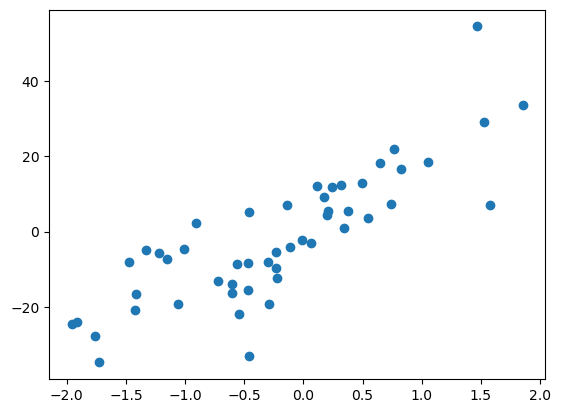

In [352]:
plt.scatter(X,y)

In [353]:
reg.fit(X,y)

LinearRegression()

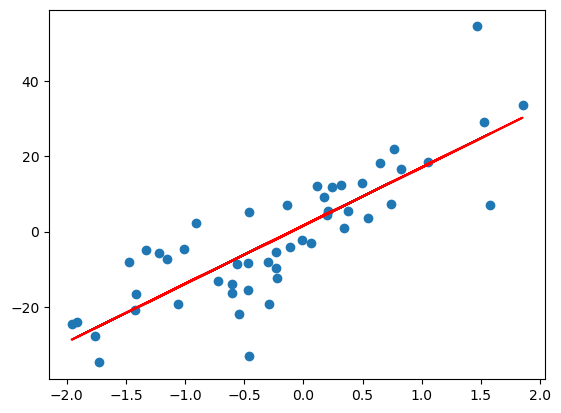

In [354]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color= 'red',label ='OLS')

In [355]:
print(reg.coef_)
print(reg.intercept_)

[15.43762655]
1.6080089267869153


In [356]:
bgd = MyBetterGD()
bgd.fit(X,y,epochs = 30, lr = 0.15)

vgd = MyGD()
vgd.fit(X,y,epochs = 30, lr = 0.15)

sgd = MySGD()
sgd.fit(X,y,epochs = 30, lr = 0.15)

Final BGD b: 1.6037240712812648
Final BGD m: 15.432802127833293
Final VGD b: -1.4224938216147726e+80
Final VGD m: -2.245146660135497e+82
Final SGD b: -3.822158217934116e+35
Final SGD m: 78.35


In [359]:
vgd = MyGD()
vgd.fit(X,y,epochs = 100, lr = 0.01)


Final VGD b: -1.6472991149786198
Final VGD m: 1.0000000000000335


([np.float64(-1.6472991149786274),
  np.float64(-1.6472991149786278),
  np.float64(-1.6472991149786287),
  np.float64(-1.647299114978628),
  np.float64(-1.6472991149786278),
  np.float64(-1.6472991149786274),
  np.float64(-1.6472991149786278),
  np.float64(-1.647299114978628),
  np.float64(-1.6472991149786296),
  np.float64(-1.6472991149786285),
  np.float64(-1.6472991149786276),
  np.float64(-1.6472991149786271),
  np.float64(-1.6472991149786265),
  np.float64(-1.6472991149786267),
  np.float64(-1.647299114978626),
  np.float64(-1.6472991149786254),
  np.float64(-1.6472991149786254),
  np.float64(-1.6472991149786234),
  np.float64(-1.6472991149786222),
  np.float64(-1.6472991149786225),
  np.float64(-1.6472991149786216),
  np.float64(-1.6472991149786214),
  np.float64(-1.647299114978621),
  np.float64(-1.6472991149786216),
  np.float64(-1.64729911497862),
  np.float64(-1.6472991149786198),
  np.float64(-1.6472991149786202),
  np.float64(-1.6472991149786198),
  np.float64(-1.6472991149

In [360]:
class MyGD:
    def __init__(self,m = 1,b= 0 ):
        self.m = 1
        self.b = 50
        self.epochs = None
        self.lr = None

    def fit(self,X,y,epochs = 10, lr =0.1):
        self.epochs = epochs
        self.lr =lr
        b_arr = []
        m_arr = []
                
        for i in range(epochs):
            loss_slope =-2*np.sum(y -self.m*X.ravel() - self.b)
            step_size = loss_slope * lr
            self.b = self.b - step_size
            b_arr.append(self.b)

            loss_slope_m =-2*np.sum((y -self.m*X.ravel() - self.b)*X)
            step_size_m = loss_slope_m * lr
            self.m = self.m - step_size_m
            m_arr.append(self.m)
            
        print("Final VGD b:", self.b)
        print("Final VGD m:", self.m)
        return b_arr,m_arr


In [367]:
vgd = MyGD()
vgd.fit(X,y,epochs = 10, lr = 0.05)

Final VGD b: -2.862961468967404e+17
Final VGD m: -1.2910462060118725e+19


([np.float64(-208.23649557489313),
  np.float64(-12303.641932766477),
  np.float64(-578834.0711981934),
  np.float64(-27114259.357296854),
  np.float64(-1269993297.6944072),
  np.float64(-59484560702.688705),
  np.float64(-2786166525413.2666),
  np.float64(-130499810516867.12),
  np.float64(-6112413019565109.0),
  np.float64(-2.862961468967404e+17)],
 [np.float64(-11644.11822738622),
  np.float64(-557083.7781433737),
  np.float64(-26104649.444726024),
  np.float64(-1222713842.8225646),
  np.float64(-57270071949.795395),
  np.float64(-2682443243069.9688),
  np.float64(-125641569438025.75),
  np.float64(-5884860382487121.0),
  np.float64(-2.7563792681196637e+17),
  np.float64(-1.2910462060118725e+19)])